In [29]:
import pandas as pd
import numpy as np

# Import the dataset

In [30]:
df = pd.read_csv("/content/Data Source (sales_transactions).csv")

# Exploring the data

In [31]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  49 non-null     object 
 3   ProductID        50 non-null     int64  
 4   ProductCategory  50 non-null     object 
 5   Quantity         50 non-null     int64  
 6   PricePerUnit     36 non-null     float64
 7   TotalAmount      36 non-null     float64
 8   TrustPointsUsed  50 non-null     int64  
 9   PaymentMethod    40 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ KB


In [33]:
df.shape

(50, 11)

In [34]:
df.describe()

,TransactionID,CustomerID,ProductID,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,DiscountApplied
count,50.000000,45.000000,50.000000,50.000000,36.000000,36.000000,50.000000,45.000000
mean,25.460000,1002.444444,2004.920000,1.420000,125.277778,155.277778,28.800000,23.888889
std,14.640188,1.306549,2.284285,1.263135,188.292874,351.596247,39.467889,13.853490
min,1.000000,1001.000000,2001.000000,-1.000000,10.000000,-500.000000,-10.000000,5.000000
25%,13.250000,1001.000000,2003.000000,1.000000,17.500000,10.000000,0.000000,15.000000
50%,25.500000,1002.000000,2005.000000,1.000000,30.000000,40.000000,20.000000,20.000000
75%,37.750000,1003.000000,2007.000000,2.000000,100.000000,150.000000,50.000000,30.000000
max,50.000000,1005.000000,2008.000000,5.000000,500.000000,1500.000000,100.000000,50.000000


In [35]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,5
TransactionDate,1
ProductID,0
ProductCategory,0
Quantity,0
PricePerUnit,14
TotalAmount,14
TrustPointsUsed,0
PaymentMethod,10


# Data preprocessing

Clean null values ( fill or remove )

In [36]:
df1 = df.copy()

In [37]:
df1["CustomerID"].fillna(0,inplace=True)
df1["CustomerID"] = df1["CustomerID"].astype(int)

In [38]:
df1["TransactionDate"] = pd.to_datetime(df1["TransactionDate"])
df1["Date"] = df1["TransactionDate"].dt.date

<ipython-input-38-b0e6cbc43c80>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["TransactionDate"] = pd.to_datetime(df1["TransactionDate"])


In [39]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Quantity"]=abs(df1["Quantity"])
#df1["PricePerUnit"].fillna(0,inplace=True)
#df1["TotalAmount"]=df1["PricePerUnit"]*df1["Quantity"]
df1["PaymentMethod"].fillna("Unknown",inplace=True)

In [41]:
df2 = df1[(df1["TransactionDate"].notna()) & (df1["PricePerUnit"].notna()) & (df1["TotalAmount"].notna())]

In [42]:
df2.reset_index(drop=True)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,Date
0,1,1002,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0,2024-08-08
1,2,0,2024-07-08 01:00:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0,2024-07-08
2,3,1004,2024-02-08 19:00:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0,2024-02-08
3,2,1003,2024-07-08 17:00:00,2001,Toys,2,30.0,60.0,50,Unknown,20.0,2024-07-08
4,7,1001,2024-01-08 13:00:00,2007,Home Decor,1,30.0,-30.0,-10,Unknown,NaN,2024-01-08
5,8,1005,2024-04-08 22:00:00,2006,Toys,1,50.0,50.0,-10,Trust Points,30.0,2024-04-08
6,10,1004,2024-01-08 14:00:00,2005,Fashion,2,500.0,1000.0,-10,Cash,30.0,2024-01-08
7,12,0,2024-09-08 13:00:00,2004,Electronics,1,10.0,10.0,-10,Cash,15.0,2024-09-08
8,14,1002,2024-08-08 21:00:00,2006,Toys,3,50.0,150.0,20,Cash,50.0,2024-08-08
9,15,1001,2024-02-08 15:00:00,2003,Toys,1,30.0,30.0,-10,Cash,20.0,2024-02-08


In [55]:
mean_price = df2[["ProductID","ProductCategory","PricePerUnit"]].groupby(["ProductID","ProductCategory"]).mean().reset_index()

In [56]:
mean_price.rename(columns={"PricePerUnit": "MeanPricePerUnit"}, inplace=True)

In [57]:
new_df1 = pd.merge(df1, mean_price, on=["ProductID", "ProductCategory"], how="left")

In [59]:
new_df1["PricePerUnit"].fillna(new_df1["MeanPricePerUnit"], inplace=True)

In [60]:
new_df1.drop(columns="MeanPricePerUnit",inplace=True)

In [61]:
new_df1["TotalAmount"] = new_df1["Quantity"]*new_df1["PricePerUnit"]

In [64]:
new_df1["TrustPointsUsed"] = abs(new_df1["TrustPointsUsed"])

# Projections possible

## Two-Variable Projections:

## Customer level

1) Average spendings by customer

Text(0.5, 1.0, 'Average spendings by each customer')

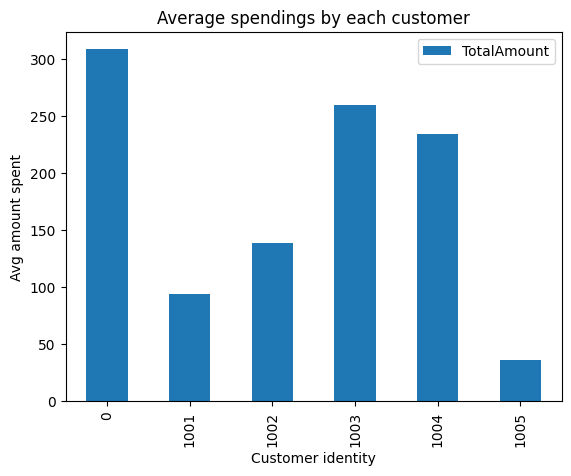

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
new_df1[["CustomerID","TotalAmount"]][new_df1["TotalAmount"].notna()].groupby("CustomerID").mean().plot(kind="bar")
plt.xlabel("Customer identity")
plt.ylabel("Avg amount spent")
plt.title("Average spendings by each customer")

2) Trust points usage by customers

Text(0.5, 1.0, 'Trust points used by each customer')

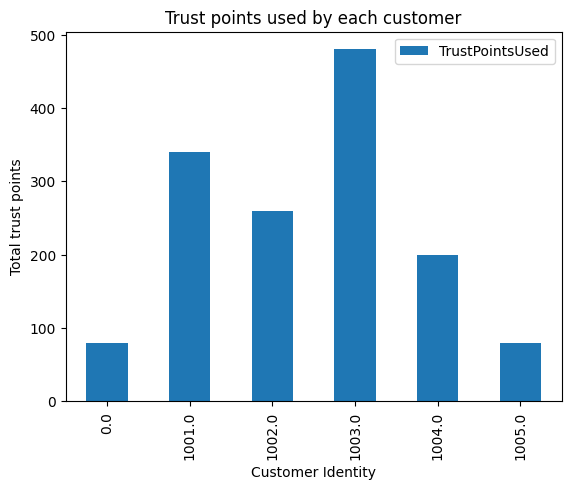

In [77]:
df[["CustomerID","TrustPointsUsed"]].fillna(0).groupby("CustomerID").sum().plot(kind="bar")
plt.xlabel("Customer Identity")
plt.ylabel("Total trust points")
plt.title("Trust points used by each customer")

3) Sales trend across dates

<Figure size 1000x1200 with 0 Axes>

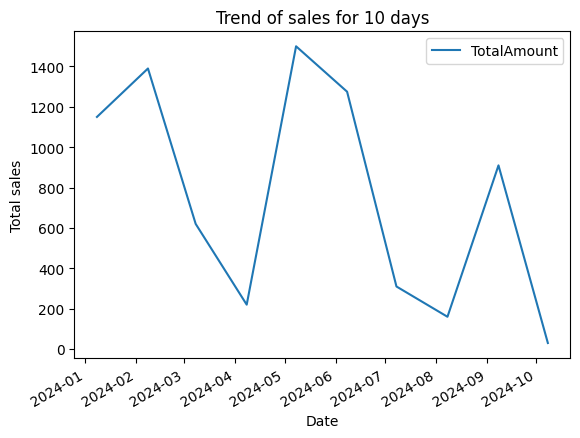

<Figure size 1000x1200 with 0 Axes>

In [87]:
new_df1[["Date","TotalAmount"]].groupby("Date").sum().sort_values(by="Date").plot(kind="line")
plt.xlabel("Date")
plt.ylabel("Total sales")
plt.title("Trend of sales for 10 days")
plt.figure(figsize=(10,12))

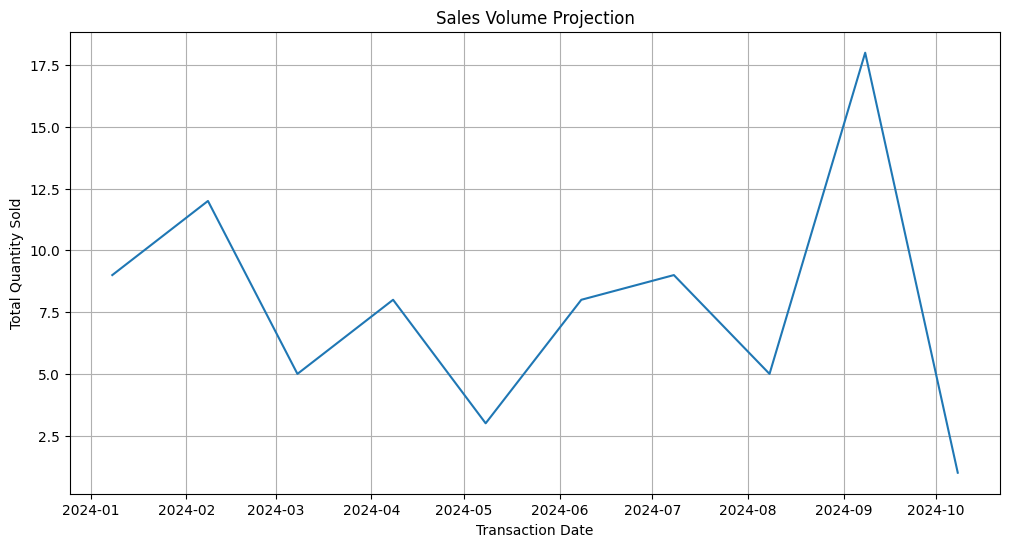

In [99]:
sales_volume = new_df1.groupby('Date')['Quantity'].sum().reset_index()

# Create the area plot
plt.figure(figsize=(12, 6))
plt.plot(sales_volume['Date'], sales_volume['Quantity'])
plt.xlabel('Transaction Date')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Volume Projection')
plt.grid()
plt.show()


## Three-Variable Projections:

TransactionDate vs. TotalAmount (Time Series Line Chart):

4) Shows the trend of total amounts over time. This is useful for identifying seasonal patterns or trends in sales.

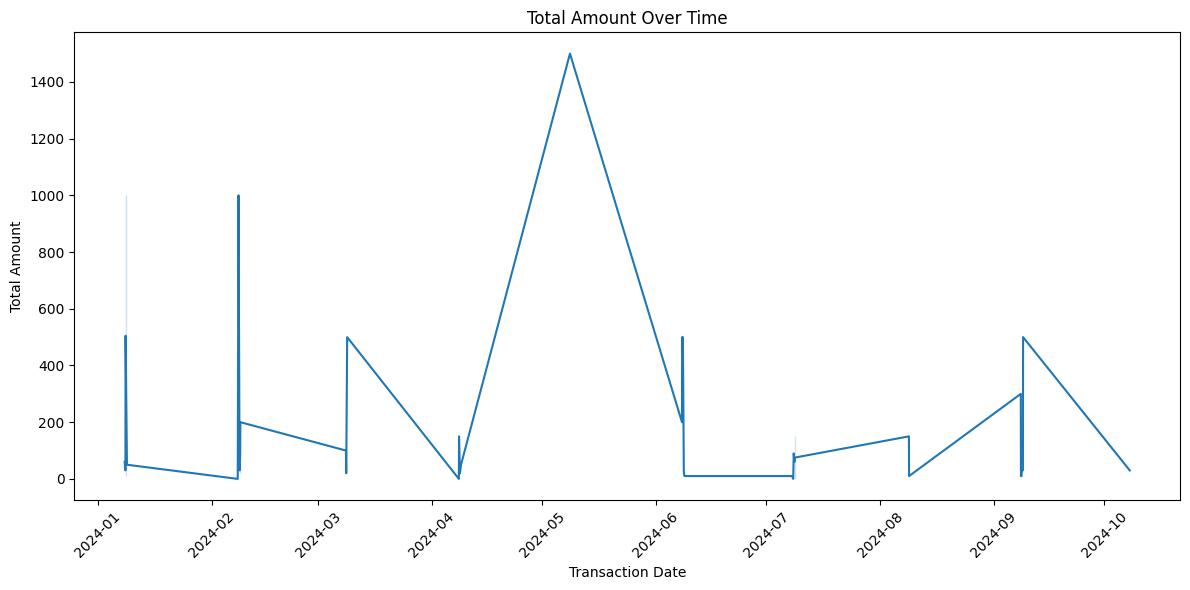

In [89]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TotalAmount', data=new_df1)
plt.title('Total Amount Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Quantity vs. TotalAmount (Scatter Plot):

5) Analyzes the relationship between the quantity of products sold and the total transaction amount.

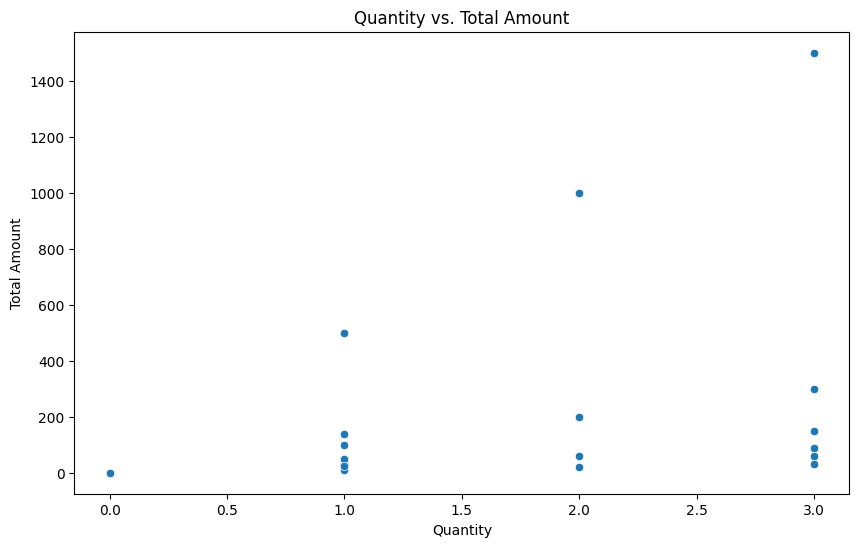

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalAmount', data=new_df1)
plt.title('Quantity vs. Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()

PricePerUnit vs. ProductCategory (Bar Chart):

6) Displays the average price per unit for each product category. This helps identify which categories have higher or lower price points.

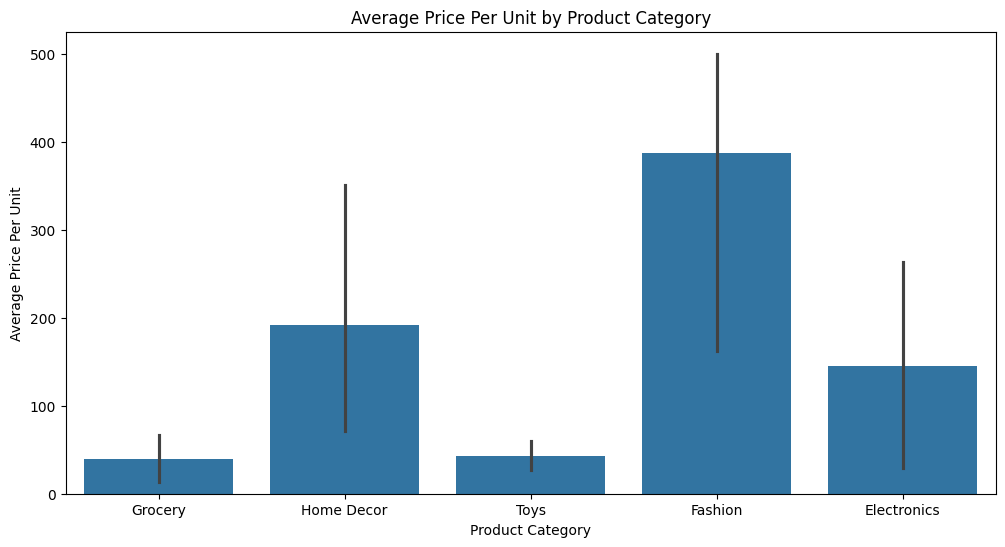

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductCategory', y='PricePerUnit', data=new_df1)
plt.title('Average Price Per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price Per Unit')
plt.show()

7) TotalAmount vs. ProductCategory vs. PaymentMethod

 TotalAmount differs not only across ProductCategory but also across different PaymentMethod within each category

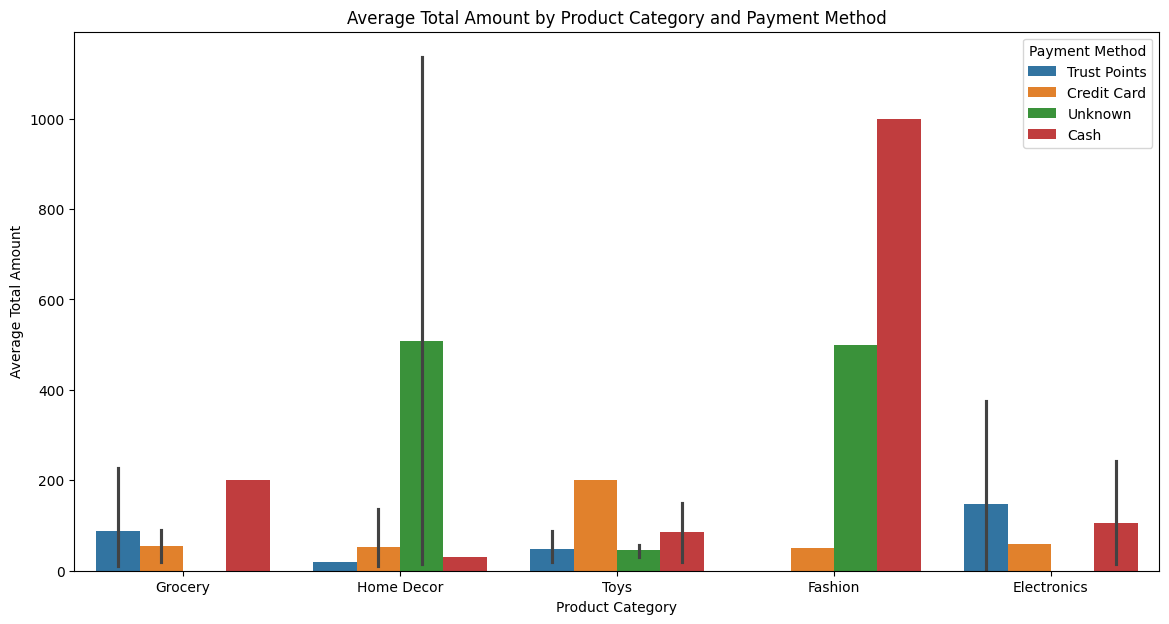

In [84]:
plt.figure(figsize=(14, 7))
sns.barplot(x='ProductCategory', y='TotalAmount', hue='PaymentMethod', data=new_df1)
plt.title('Average Total Amount by Product Category and Payment Method')
plt.xlabel('Product Category')
plt.ylabel('Average Total Amount')
plt.legend(title='Payment Method')
plt.show()

8) Heat Map

Aggregated view and identify patterns across PricePerUnit, Quantity and TotalAmount

<ipython-input-85-1ef02589c268>:1: FutureWarning: The provided callable <function mean at 0x7957dc917d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = new_df1.pivot_table(values='PricePerUnit', index='Quantity', columns='TotalAmount', aggfunc=np.mean)


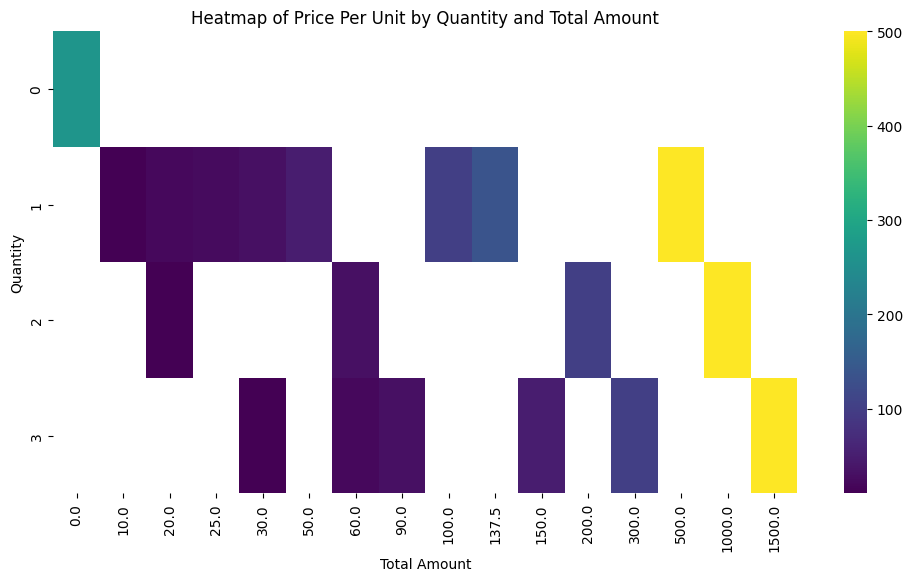

In [85]:
pivot_table = new_df1.pivot_table(values='PricePerUnit', index='Quantity', columns='TotalAmount', aggfunc=np.mean)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap of Price Per Unit by Quantity and Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Quantity')
plt.show()